In [4]:
%matplotlib inline
%pylab inline
import pylab
pylab.rcParams['figure.figsize'] = (5.0, 5.0)
# from tsne import bh_sne # thi is the correct tsne to use.  It's the one discussed btnw
# from bhtsne import bh_tsne
import sklearn.manifold
from matplotlib import pyplot as plt
import pandas
import scipy
import numpy as np
import os
import gc
from time import gmtime, strftime
import seaborn as sns
from os import listdir
from os.path import isfile, join
import math
from scipy.stats.stats import pearsonr
import random as rand
from sklearn.preprocessing import normalize
from collections import defaultdict
import pickle
# from helpers import *
execfile( "./helpers.py")

Populating the interactive namespace from numpy and matplotlib
helpers executed


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
hcad = load_dataset("/home/ubuntu/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd")
META = load_dataset("/home/ubuntu/Dropbox/data_for_brian/meta/df_meta.hd")


loading...
Opening /home/ubuntu/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd in read-only mode


/usr/lib/python2.7/dist-packages/pandas/io/pytables.py:528: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to update your source code.
  self._handle = tables.openFile(self._path, self._mode, **kwargs)
/usr/lib/python2.7/dist-packages/pandas/io/pytables.py:532: DeprecationWarning: openFile() is pending deprecation, use open_file() instead. You may use the pt2to3 tool to update your source code.
  self._handle = tables.openFile(self._path, 'r', **kwargs)
/usr/lib/python2.7/dist-packages/pandas/io/pytables.py:1044: DeprecationWarning: getNode() is pending deprecation, use get_node() instead. You may use the pt2to3 tool to update your source code.
  return self._handle.getNode(self.root, key)
/usr/lib/python2.7/dist-packages/pandas/core/series.py:1001: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  arr = operator.neg(self.values)
/usr/lib/p

TypeError: 'numpy.float64' object does not support item assignment

In [4]:


import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet




net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('hidden', layers.DenseLayer),
            #('hidden2', layers.DenseLayer),
            ('output', layers.DenseLayer),
            ],
    # layer parameters:
    input_shape=(None, 65),
    hidden_num_units=1,  # number of units in 'hidden' layer
     hidden_nonlinearity = lasagne.nonlinearities.linear,
    #hidden2_num_units=30,  # number of units in 'hidden' layer

    output_nonlinearity=lasagne.nonlinearities.sigmoid,
    output_num_units=65, 

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=.1,
    update_momentum=0.9,

    max_epochs=1000,
    verbose=1,
     regression=True,
    objective_loss_function = lasagne.objectives.squared_error
    )

    # Train the network
print("training...")
data = np.array(hcad).astype(float32)

net1.fit(data, data)

# # Try the network on new data
# print("Feature vector (100-110): %s" % data['X_test'][0])
# print("Label: %s" % str(data['y_test'][0]))
# print("Predicted: %s" % str(net1.predict([data['X_test'][0]])))


training...
# Neural Network with 196 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input       65
  1  hidden       1
  2  output      65

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.00836       0.01610      0.51942  2.13s
      2       0.00223       0.01586      0.14043  2.10s
      3       0.00220       0.01566      0.14035  2.09s
      4       0.00218       0.01547      0.14086  2.09s
      5       0.00216       0.01527      0.14160  2.12s
      6       0.00214       0.01502      0.14248  2.13s
      7       0.00211       0.01469      0.14344  2.11s
      8       0.00205       0.01419      0.14451  2.12s
      9       0.00195       0.01335      0.14576  2.13s
     10       0.00178       0.01230      0.14456  2.12s
     11       0.00158       0.01168      0.13547  2.14s
     12       0.00143       0.01127      0.12660  2.16s
     13       0.00132       0.01084

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fad084aa590>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fad084aa450>,
     check_input=True, custom_scores=None,
     hidden_nonlinearity=<function linear at 0x7fad0893ccf8>,
     hidden_num_units=1, input_shape=(None, 65),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=1000, more_params={},
     objective=<function objective at 0x7fad084a77d0>,
     objective_loss_function=<function squared_error at 0x7fad084f2a28>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7fad005ae368>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7facfcd7b710>],
     output_nonlinearity=<function sigmoi

## histogram of hidden unit activation

[[ 4.77377713]
 [ 4.67398325]
 [ 5.01279516]
 ..., 
 [ 5.35436107]
 [ 5.53015359]
 [ 5.50688109]]
[ 4.77377713  4.67398325  5.01279516 ...,  5.35436107  5.53015359
  5.50688109]


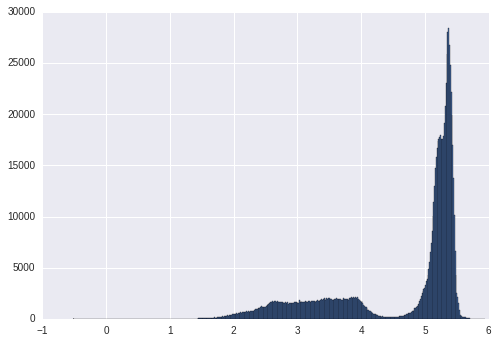

In [10]:
# print(hcad)
hidden_activations = lasagne.layers.get_output(net1.get_all_layers()[1], hcad).eval()
print hidden_activations
np.save("/home/isaac/Desktop/devika/gitignored/autoencoder_hidden_activations", hidden_activations)
print((hidden_activations.T[0]))
plt.hist(hidden_activations, bins = 500)
plt.show()



## hidden unit activation over Harris County

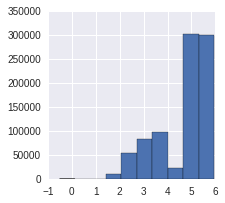

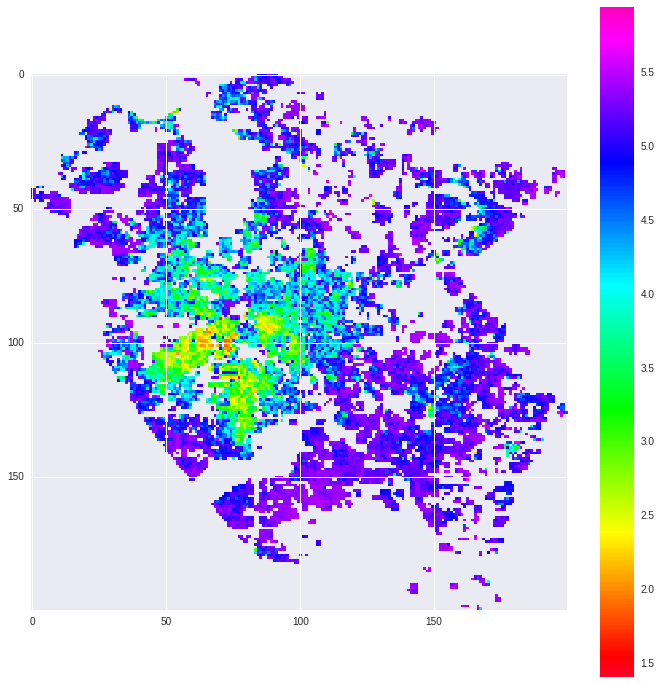

In [6]:
def plot_on_map(pddf, meta = META):
    for col in pddf.columns:
        xy = pandas.DataFrame.from_dict({'x': -meta['pointx'],'y': meta['pointy']})
        old_fast_show_ratio_plot(xy,np.array(pddf[col]))

plot_on_map(pandas.DataFrame.from_dict({"x": hidden_activations.T[0]}))

## network weights

/usr/local/lib/python2.7/dist-packages/nolearn/lasagne/base.py:756: UserWarning: The 'save_weights_to' method will be removed in nolearn 0.6. Please use 'save_params_to' instead.
  warn("The 'save_weights_to' method will be removed in nolearn 0.6. "


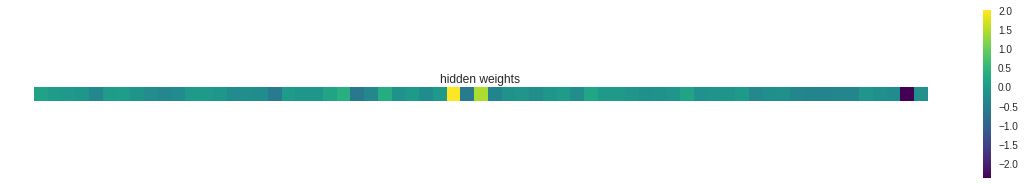

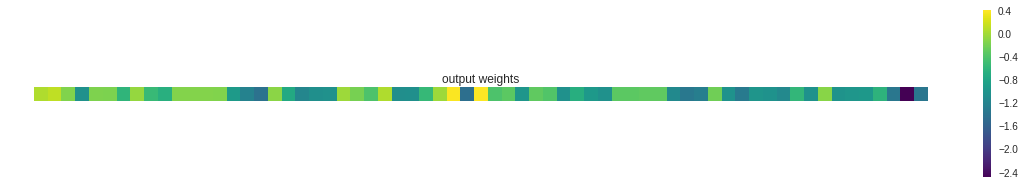

In [7]:
net1.save_weights_to("weightfile.p")
with open('weightfile.p', 'rb') as handle:
  b = pickle.load(handle)
# print(b['hidden'])
# print(b.keys())
    
hidden_weights = numpy.array(b['hidden'][0])
plt.figure(figsize=(20,3))
plt.imshow(hidden_weights.T,cmap="viridis", interpolation="nearest")
plt.colorbar()
plt.axis('off')
plt.title("hidden weights")
plt.show()
# for col, weight in sorted(zip(hcad.columns, hidden_weights), key = lambda x: x[1][0]):
#     print (weight[0], col)




output_weights = numpy.array(b['output'][0].T)
plt.figure(figsize=(20,3))
plt.imshow(output_weights.T,cmap="viridis", interpolation="nearest")
plt.colorbar()
plt.axis('off')
plt.title("output weights")
plt.show()
# for col, weight in sorted(zip(hcad.columns, output_weights), key = lambda x: x[1][0]):
#     print (weight[0], col)
    


## running the neural net as a simple numpy operation

[  2.09806477e-02   4.31780947e-01   5.98949333e-02   2.93216567e-03
   6.50270334e-02   4.81526406e-02   6.79275981e-03   4.00793651e-01
   1.10965512e-02   6.18798470e-03   7.60808117e-02   6.37777931e-02
   7.28729604e-02   7.28729604e-02   1.31078273e-02   1.06040581e-03
   0.00000000e+00   1.14267058e-01   6.25560638e-03   7.43664712e-04
   2.83641370e-03   3.16354914e-03   2.01588502e-01   3.33333333e-01
   8.16022585e-03   2.39215686e-01   2.68756574e-03   2.93216567e-03
   1.07631365e-02   2.01588502e-01   9.61838394e-01   1.24548512e-04
   9.61857380e-01   1.01377316e-01   3.37519777e-02   2.21314776e-03
   6.22882838e-02   4.53925339e-02   2.13090552e-03   0.00000000e+00
   6.01524272e-03   2.13714769e-03   5.14042620e-02   3.37519777e-02
   6.22882838e-02   6.22882838e-02   1.37235897e-02   1.73533479e-04
   0.00000000e+00   5.44836606e-02   2.11789755e-03   1.15219203e-04
   2.07635698e-03   2.33395956e-03   2.36131796e-03   2.35702260e-01
   1.87860941e-03   1.65628615e-01

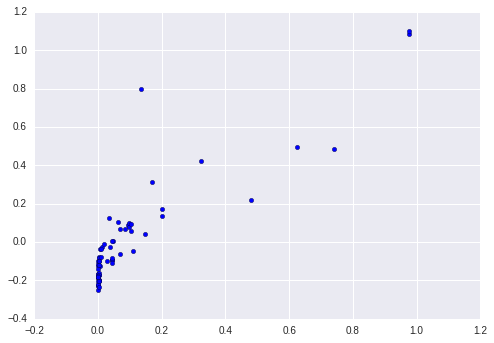

In [60]:
import math

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

row = np.array(hcad)[2330]
print(row)
print (hidden_weights.shape)
# print (row.shape)

hidden_activation = np.mean(np.multiply(b['hidden'][0].T[0], row) + b['hidden'][1][0])

output_activation = sigmoid((b['output'][0][0] * hidden_activation + b['output'][1]))
print(net1.predict(hcad.astype(float32))[0])
print(output_activation)
plt.scatter(net1.predict(hcad.astype(float32))[0], output_activation)
plt.show()